<div style="border-radius: 10px; border: #B0E0E6 solid; padding: 15px; background-color: #F0F8FF; font-size: 100%; text-align: left">
    <font size="2px" color="#000000">
        <h2>Project Title: Sprint 2 - Generalized Anxiety Modelling</h2>
        <p>Author: Kouyu (Coco) Yang</p>  
        <p>Date Filed: Nov 9th, 2023</p>  
        <p>Contact: <a href="mailto:cocoyang526@gmail.com">cocoyang526@gmail.com</a></p>  
    </font>
</div>

## **Table of Contents**

<div style="border-radius: 10px; border: #B0E0E6 solid; padding: 15px; background-color: #F0F8FF; font-size: 100%; text-align: left">
<font size="2px" color="#000000">
<a href="#part-1-project-introduction">Part 1 Project Introduction</a> <br>
    
<a href="#part-2-data-preprocessing">Part 2 Data Preprocessing</a> <br>
<a href="#2.1-correlation--p-value">2.1 Correlation & P-value</a> <br>
<a href="#2.2-check-colinearity">2.2 Check Colinearity</a> <br>
    
<a href="#part-3-multinomial-logistic-regression">Part 3 Multinomial Logistic Regression</a> <br>
<a href="#3.1-baseline-model">3.1 Baseline Model</a> <br>
<a href="#3.2-apply-scaler">3.2 Apply Scaler</a> <br>
<a href="#3.3-pca">3.3 PCA</a> <br>
<a href="#3.4-parameter-tuning">3.4 Parameter Tuning</a> <br>
<a href="#3.5-model-evaluation">3.5 Model Evaluation</a> <br>
    
<a href="#part-4-random-forest">Part 4 Random Forest</a> <br>
<a href="#4.1-data-preprocessing">4.1 Data Preprocessing</a> <br>
<a href="#4.2-baseline-model">4.2 Baseline Model</a> <br>
<a href="#4.3-hyperparameter-tuning">4.3 Hyperparameter Tuning</a> <br>
<div>

### **Part 1 Project Introduction** 

<div style="border-radius:10px; border: #B0E0E6 solid; padding: 15px; background-color: #F0F8FF; font-size:100%; text-align:left">
<font size="2px" color="#000000">  

In this notebook, we dive into predictive modeling for the Anxiety target column, employing two key models. We start with a **Multinomial Logistic Regression**, exploring its baseline and enhanced versions through scaling, PCA, and hyperparameter tuning. Following this, we introduce a **Random Forest**, examining both its baseline performance and the outcomes of hyperparameter tuning. To evaluate the models, we use standard metrics like accuracy rates and Confusion Matrix. This notebook is a crucial segment of our capstone, offering insights into the predictive capabilities of our models and the intricate connection between household factors and mental well-being.

<div>

In [70]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [71]:
df = pd.read_csv('/Users/kouyuyang/Brainstation/Capstone/Sprint 2/Feature Engineering Data.csv')

df.head()                 

Education  Total People  Total Children  Income  Food Spend  \
0        4.0             2               0     7.0       200.0   
1        3.0             1               0     4.0       200.0   
2        4.0             1               0     6.0        65.0   
3        2.0             4               1     0.0       200.0   
4        4.0             2               0     6.0       300.0   

   Medical Shortage  Depression_encoded  Anxiety_encoded  Age Generation  \
0                 0                   0                1             1.0   
1                 0                   0                0             3.0   
2                 0                   1                1             1.0   
3                 0                   2                2             2.0   
4                 0                   0                0             1.0   

   Work Loss_No  ...  Accommodation_Rented  Food Supply_Enough Food  \
0             1  ...                     0                        1   
1             0  ...                     0                        1   
2             1  ...                     0                        1   
3             1  ...                     1                        0   
4             1  ...                     1                        1   

   Food Supply_Often Not Enough  Food Supply_Sometimes Not Enough  \
0                             0                                 0   
1                             0                                 0   
2                             0                                 0   
3                             0                                 1   
4                             0                                 0   

   Active Duty_No  Active Duty_On Active Duty  \
0               1                           0   
1               1                           0   
2               1                           0   
3               1                           0   
4               1                           0   

   Active Duty_Spouse On Active Duty  Veteran_No  Veteran_Served Active Duty  \
0                                  0           1                           0   
1                                  0           1                           0   
2                                  0           1                           0   
3                                  0           1                           0   
4                                  0           1                           0   

   Veteran_Spouse Served Active Duty  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 56 columns]

In [72]:
df.shape

(54584, 56)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54584 entries, 0 to 54583
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Education                            54584 non-null  float64
 1   Total People                         54584 non-null  int64  
 2   Total Children                       54584 non-null  int64  
 3   Income                               54584 non-null  float64
 4   Food Spend                           54584 non-null  float64
 5   Medical Shortage                     54584 non-null  int64  
 6   Depression_encoded                   54584 non-null  int64  
 7   Anxiety_encoded                      54584 non-null  int64  
 8   Age Generation                       54584 non-null  float64
 9   Work Loss_No                         54584 non-null  int64  
 10  Work Loss_Yes                        54584 non-null  int64  
 11  Any Work_No                 

In [74]:

X = df.drop(columns ='Anxiety_encoded')
y = df['Anxiety_encoded']

In [75]:
print(X.shape)
print(y.shape)

(54584, 55)
(54584,)


In [76]:
corr_df = X.corr()
corr_df

Education  Total People  Total Children  \
Education                             1.000000     -0.036554       -0.013095   
Total People                         -0.036554      1.000000        0.779760   
Total Children                       -0.013095      0.779760        1.000000   
Income                                0.325305      0.162639        0.102283   
Food Spend                           -0.016482      0.353284        0.297099   
Medical Shortage                     -0.032596      0.087841        0.072188   
Depression_encoded                    0.094191     -0.015346       -0.019072   
Age Generation                       -0.065136     -0.251035       -0.311123   
Work Loss_No                          0.067534     -0.075326       -0.035108   
Work Loss_Yes                        -0.066327      0.077240        0.036330   
Any Work_No                          -0.120112     -0.135673       -0.151191   
Any Work_Yes                          0.121241      0.135541        0.150824   
Unemployment Insurance Receive_No     0.015855      0.002240        0.000470   
Unemployment Insurance Receive_Yes   -0.010118      0.002263        0.003026   
Had Covid-19_No                      -0.058698     -0.104632       -0.093405   
Had Covid-19_Yes                      0.062335      0.106308        0.095155   
Covid Vaccinated_No                  -0.175242      0.117668        0.139291   
Covid Vaccinated_Yes                  0.175541     -0.114671       -0.136726   
Gender Identity_Female               -0.046490      0.015836        0.047179   
Gender Identity_Male                  0.056185     -0.013790       -0.039555   
Gender Identity_None of these         0.001854      0.011444       -0.004105   
Gender Identity_Transgender           0.002644     -0.005262       -0.013631   
Sexual orientation_Bisexual           0.009826     -0.008694       -0.007412   
Sexual orientation_Gay or lesbian     0.031336     -0.085338       -0.078982   
Sexual orientation_Something else     0.014019     -0.004201       -0.008898   
Sexual orientation_Straight          -0.020520      0.057190        0.057057   
Race/Hispanic ethnicity_Asian         0.068957      0.038792        0.020576   
Race/Hispanic ethnicity_Black        -0.053460      0.009604        0.025402   
Race/Hispanic ethnicity_Hispanic     -0.072634      0.093361        0.066991   
Race/Hispanic ethnicity_White         0.058975     -0.103437       -0.081595   
Marriage status_Divorced             -0.079843     -0.162988       -0.075948   
Marriage status_Never married         0.020984     -0.176741       -0.132903   
Marriage status_Now married           0.080080      0.320095        0.191351   
Marriage status_Separated            -0.039669     -0.001083        0.026253   
Marriage status_Widowed              -0.059624     -0.128371       -0.078246   
Price Change_Decreased                0.026196     -0.019735       -0.025104   
Price Change_Increased               -0.113051      0.041288        0.027815   
Price Change_Not changed              0.108357     -0.025913       -0.015483   
Price Stress_A little stressful       0.081666     -0.057910       -0.061391   
Price Stress_Moderately stressful    -0.007339     -0.013670       -0.022017   
Price Stress_Not at all stressful     0.053216     -0.055946       -0.059758   
Price Stress_Very stressful          -0.180032      0.124335        0.126187   
Accommodation_Fully Owned            -0.012131     -0.121618       -0.159140   
Accommodation_Occupied without rent  -0.027434      0.002611        0.007859   
Accommodation_Owned with mortgage     0.089209      0.195411        0.165301   
Accommodation_Rented                 -0.081309     -0.105521       -0.034350   
Food Supply_Enough Food               0.163632     -0.048921       -0.054692   
Food Supply_Often Not Enough         -0.087400      0.022417        0.022404   
Food Supply_Sometimes Not Enough     -0.135159      0.043708        0.051492   
Active Duty_No                       

In [77]:
from scipy import stats
#Create an empty dictionary
independent_columns = df.columns.drop(['Depression_encoded'])
coef_p={'Variable':[],
      'Correlation Coefficient':[],
      'P-value':[]}

#Write a loop for running the Pearson Test and append the p-values and correlation coefficients to dictionary
for column in independent_columns:
    X = df[column]
    y = df['Depression_encoded']
    tval, p = stats.pearsonr(X,y)
    
    coef_p['Variable'].append(column)
    coef_p['Correlation Coefficient'].append(tval)
    coef_p['P-value'].append(p)

#Transfer to DataFrame and round the number for better view
coef_p_df = pd.DataFrame(coef_p)
coef_p_df['P-value']=round(coef_p_df['P-value'],4)
coef_p_df

Variable  Correlation Coefficient  P-value
0                             Education                 0.094191   0.0000
1                          Total People                -0.015346   0.0003
2                        Total Children                -0.019072   0.0000
3                                Income                 0.222684   0.0000
4                            Food Spend                -0.017964   0.0000
5                      Medical Shortage                -0.213184   0.0000
6                       Anxiety_encoded                 0.700100   0.0000
7                        Age Generation                 0.194797   0.0000
8                          Work Loss_No                 0.154762   0.0000
9                         Work Loss_Yes                -0.154145   0.0000
10                          Any Work_No                 0.008599   0.0445
11                         Any Work_Yes                -0.008649   0.0433
12    Unemployment Insurance Receive_No                 0.035698   0.0000
13   Unemployment Insurance Receive_Yes                -0.038254   0.0000
14                      Had Covid-19_No                 0.012596   0.0033
15                     Had Covid-19_Yes                -0.013855   0.0012
16                  Covid Vaccinated_No                -0.052091   0.0000
17                 Covid Vaccinated_Yes                 0.049913   0.0000
18               Gender Identity_Female                -0.039156   0.0000
19                 Gender Identity_Male                 0.057002   0.0000
20        Gender Identity_None of these                -0.070788   0.0000
21          Gender Identity_Transgender                -0.043499   0.0000
22          Sexual orientation_Bisexual                -0.130201   0.0000
23    Sexual orientation_Gay or lesbian                -0.042848   0.0000
24    Sexual orientation_Something else                -0.078355   0.0000
25          Sexual orientation_Straight                 0.152005   0.0000
26        Race/Hispanic ethnicity_Asian                 0.023503   0.0000
27        Race/Hispanic ethnicity_Black                -0.004004   0.3495
28     Race/Hispanic ethnicity_Hispanic                -0.035282   0.0000
29        Race/Hispanic ethnicity_White                 0.039036   0.0000
30             Marriage status_Divorced                -0.062202   0.0000
31        Marriage status_Never married                -0.145851   0.0000
32          Marriage status_Now married                 0.169975   0.0000
33            Marriage status_Separated                -0.051248   0.0000
34              Marriage status_Widowed                 0.013369   0.0018
35               Price Change_Decreased                 0.037408   0.0000
36               Price Change_Increased                -0.106052   0.0000
37             Price Change_Not changed                 0.093989   0.0000
38      Price Stress_A little stressful                 0.181056   0.0000
39    Price Stress_Moderately stressful                 0.029078   0.0000
40    Price Stress_Not at all stressful                 0.141412   0.0000
41          Price Stress_Very stressful                -0.340631   0.0000
42            Accommodation_Fully Owned                 0.120001   0.0000
43  Accommodation_Occupied without rent                -0.039865   0.0000
44    Accommodation_Owned with mortgage                 0.058173   0.0000
45                 Accommodation_Rented                -0.178709   0.0000
46              Food Supply_Enough Food                 0.249573   0.0000
47         Food Supply_Often Not Enough                -0.153324   0.0000
48     Food Supply_Sometimes Not Enough                -0.201614   0.0000
49                       Active Duty_No                 0.000430   0.9199
50           Active Duty_On Active Duty                 0.003662   0.3922
51    Active Duty_Spouse On Active Duty                -0.005329   0.2131
52                           Veteran_No                -0.037160   0.0000
53           Veteran_Served Active 

In [78]:
df.drop(columns=['Race/Hispanic ethnicity_Black','Active Duty_No','Active Duty_On Active Duty','Active Duty_Spouse On Active Duty'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54584 entries, 0 to 54583
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Education                            54584 non-null  float64
 1   Total People                         54584 non-null  int64  
 2   Total Children                       54584 non-null  int64  
 3   Income                               54584 non-null  float64
 4   Food Spend                           54584 non-null  float64
 5   Medical Shortage                     54584 non-null  int64  
 6   Depression_encoded                   54584 non-null  int64  
 7   Anxiety_encoded                      54584 non-null  int64  
 8   Age Generation                       54584 non-null  float64
 9   Work Loss_No                         54584 non-null  int64  
 10  Work Loss_Yes                        54584 non-null  int64  
 11  Any Work_No                 

In [79]:

X = df.drop(columns ='Anxiety_encoded')
y = df['Anxiety_encoded']

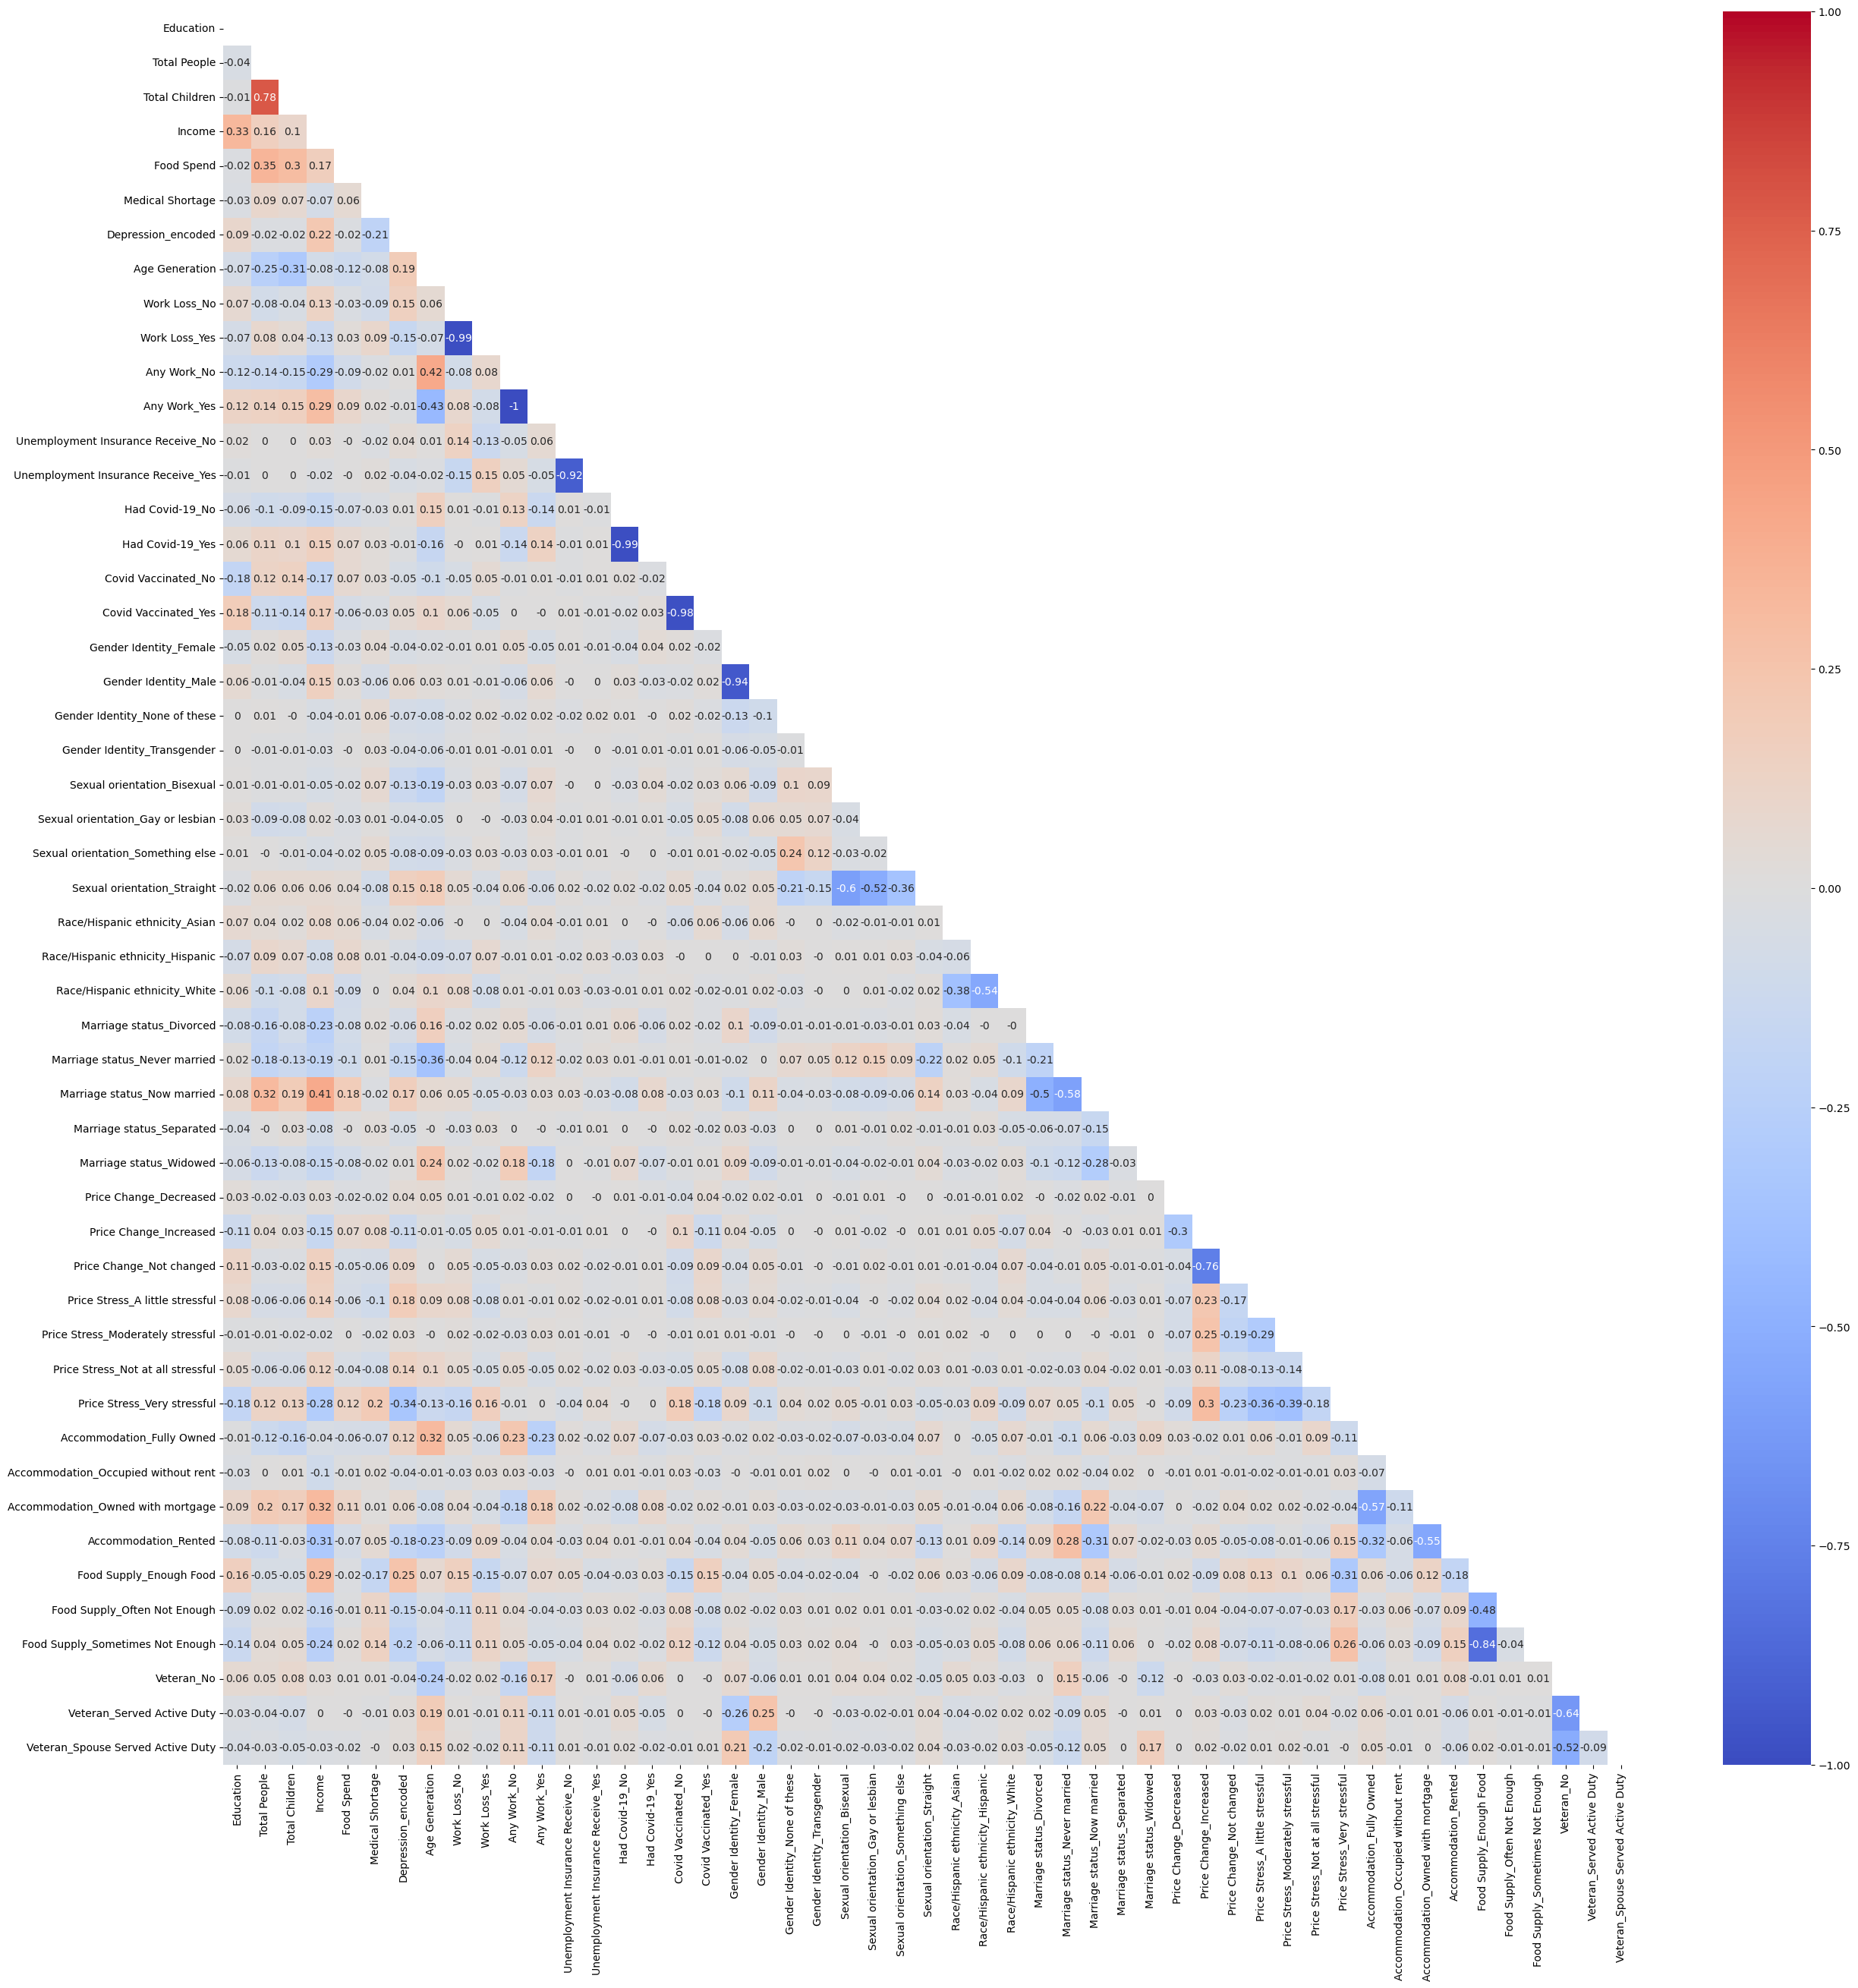

In [80]:
corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(30, 30))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

In [81]:
df.drop(columns = ['Work Loss_No','Any Work_No','Unemployment Insurance Receive_No','Had Covid-19_No','Covid Vaccinated_No','Gender Identity_Male'],inplace=True)

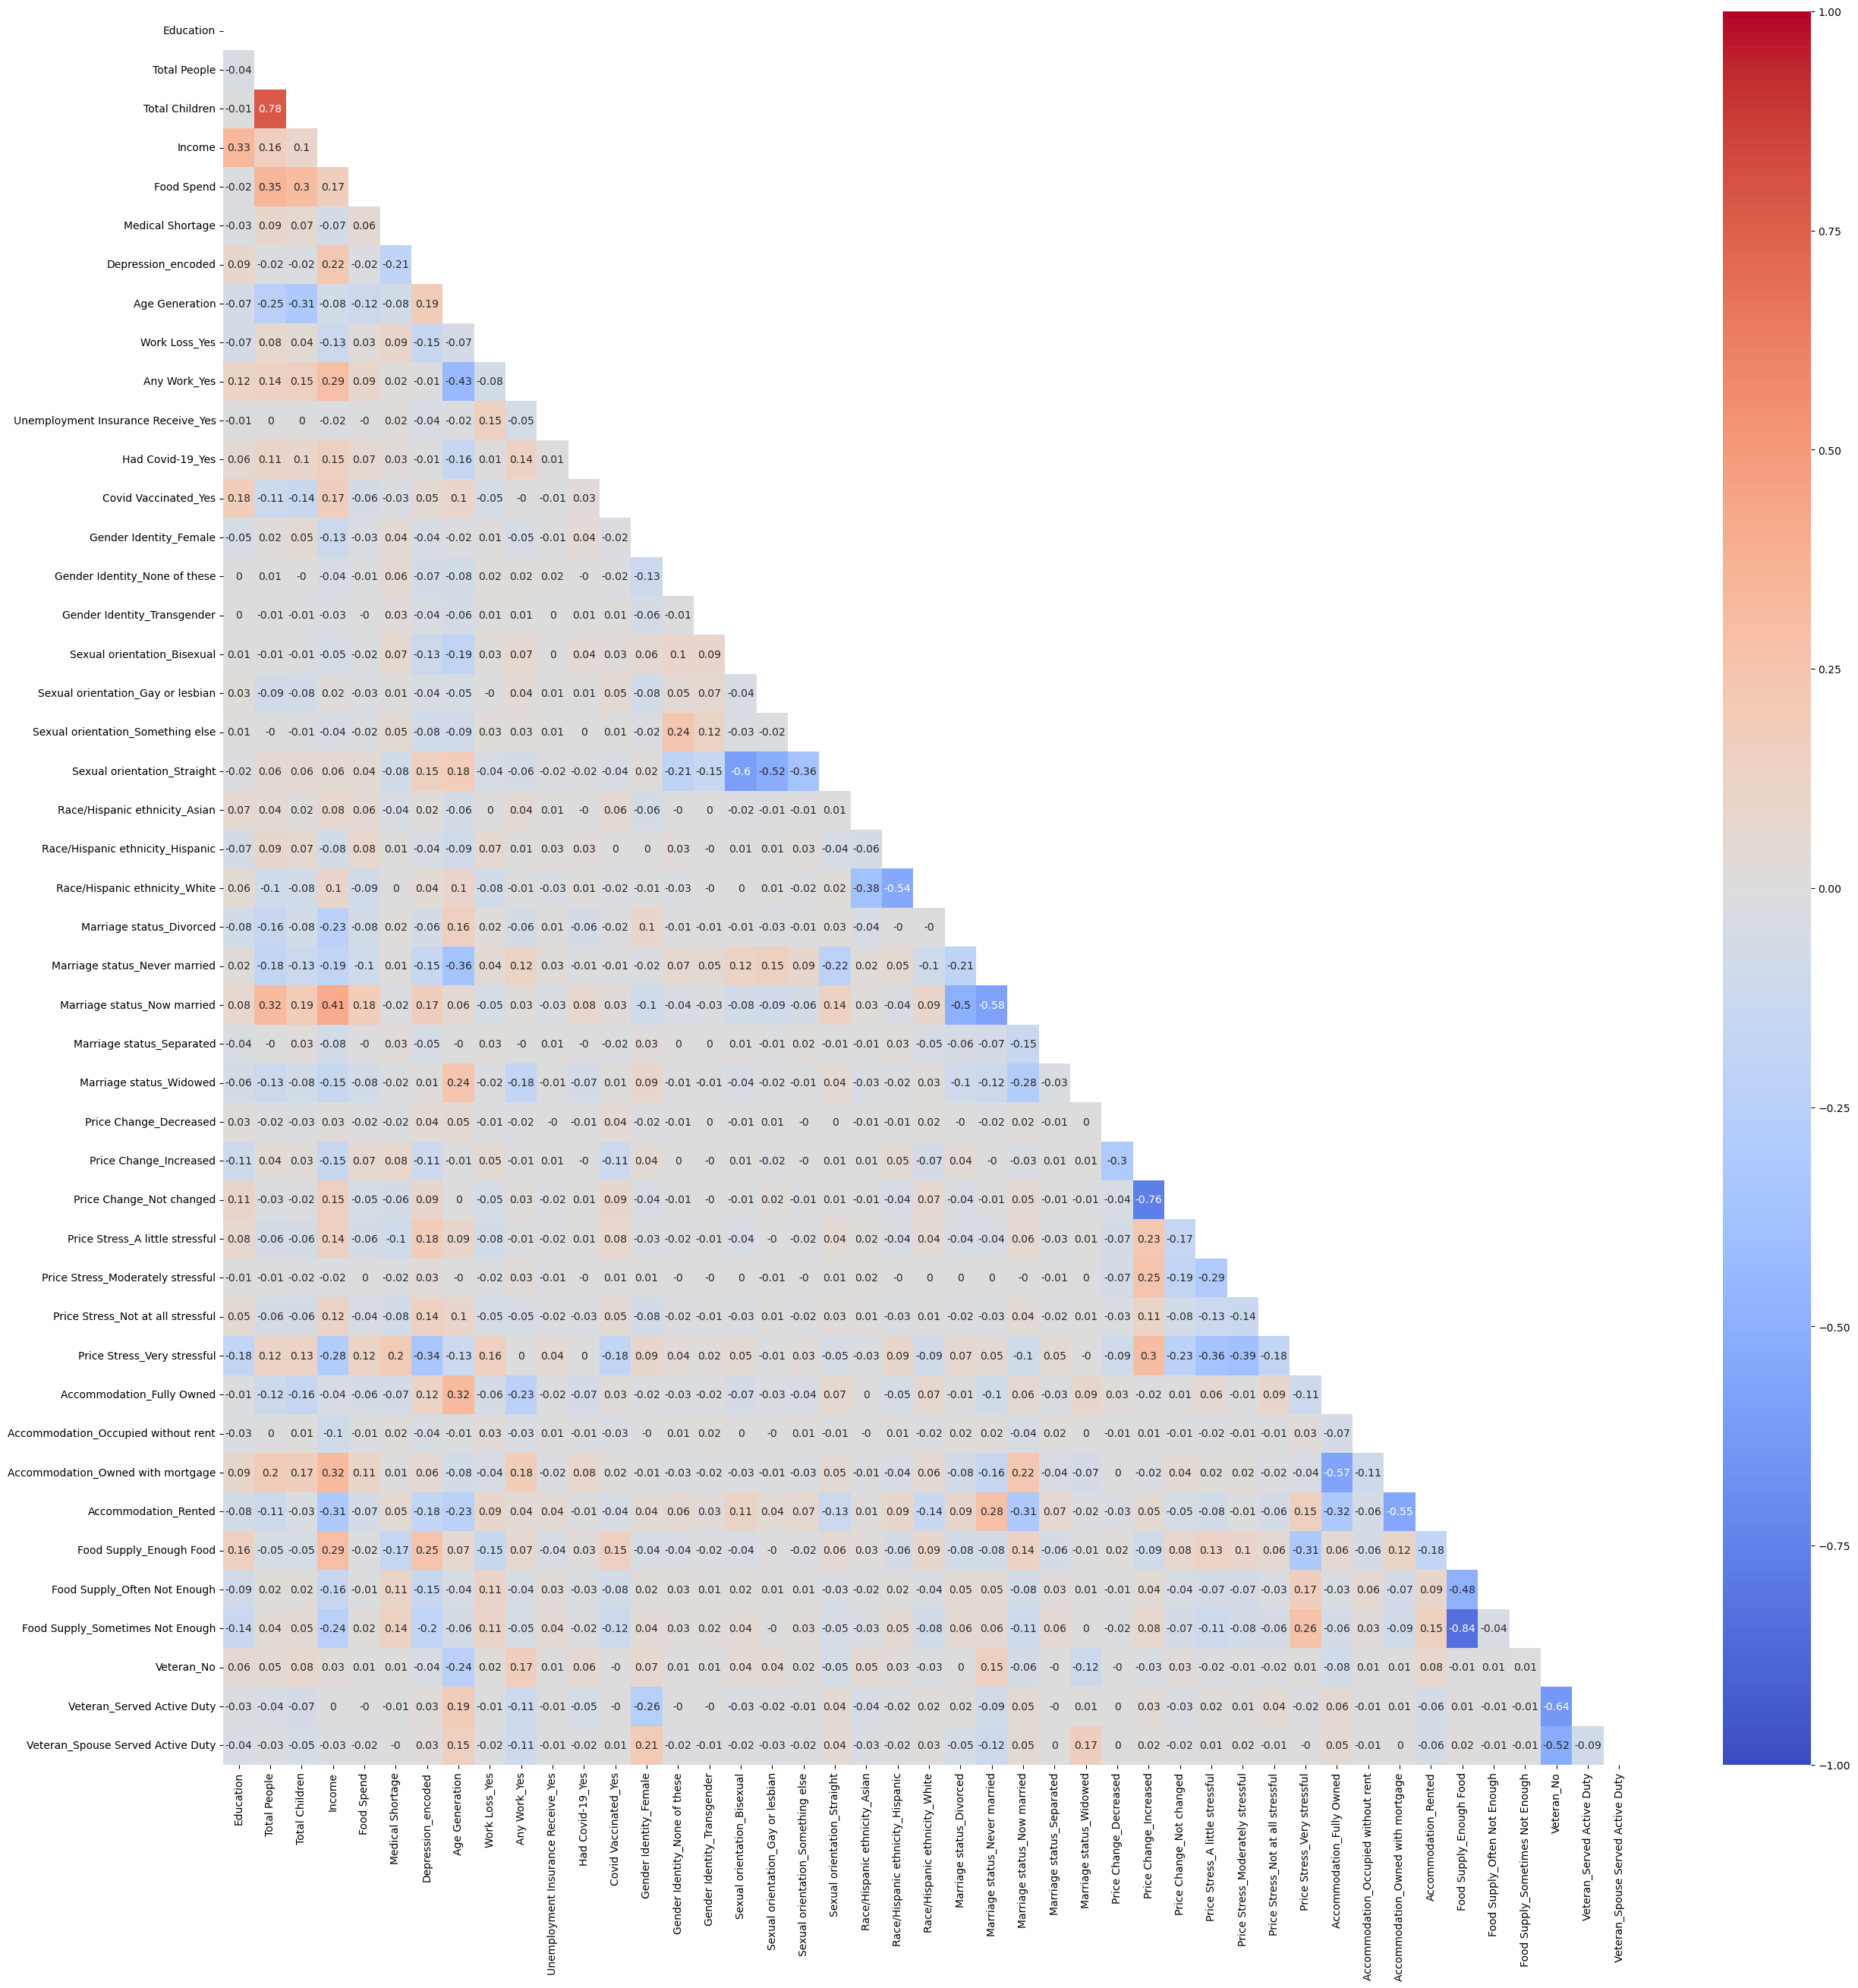

In [82]:
X = df.drop(columns ='Anxiety_encoded')
y = df['Anxiety_encoded']

corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(30, 30))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

In [83]:
df.drop(columns = ['Total People','Price Change_Not changed','Food Supply_Sometimes Not Enough'],inplace=True)

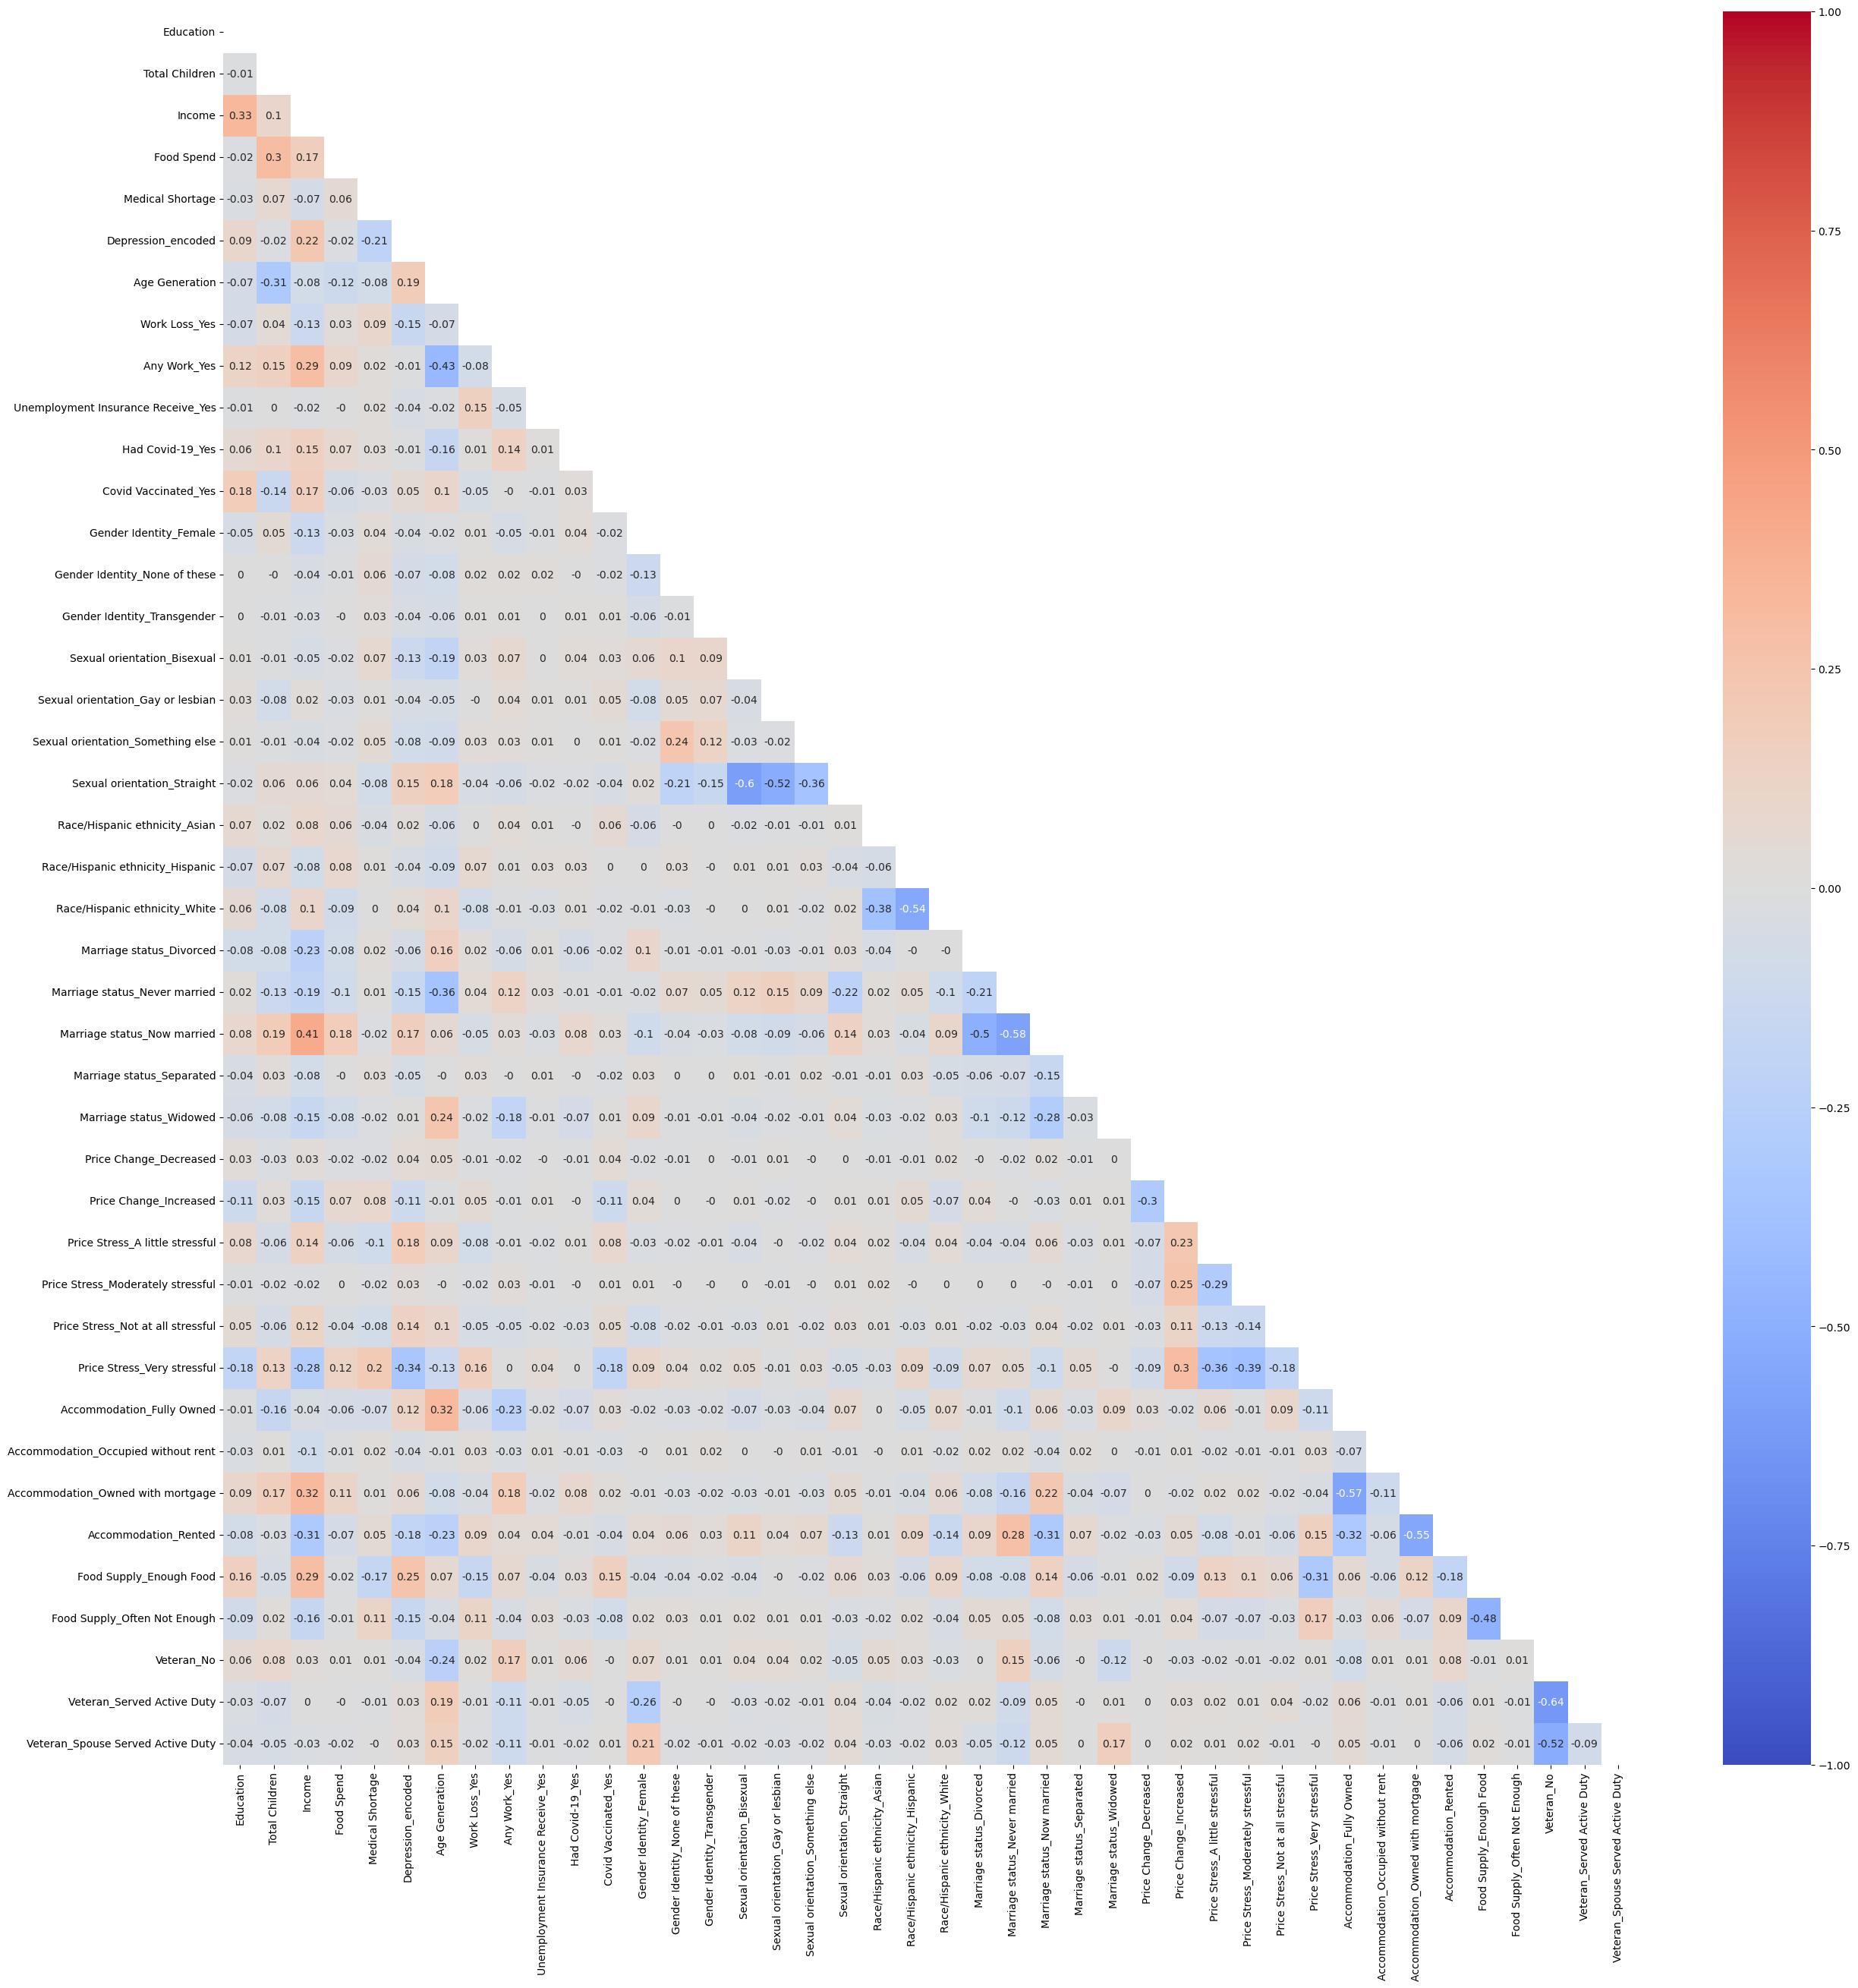

In [84]:
X = df.drop(columns ='Anxiety_encoded')
y = df['Anxiety_encoded']

corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(30, 30))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

In [85]:
df.drop(columns = ['Sexual orientation_Straight','Marriage status_Now married','Veteran_No'],inplace=True)

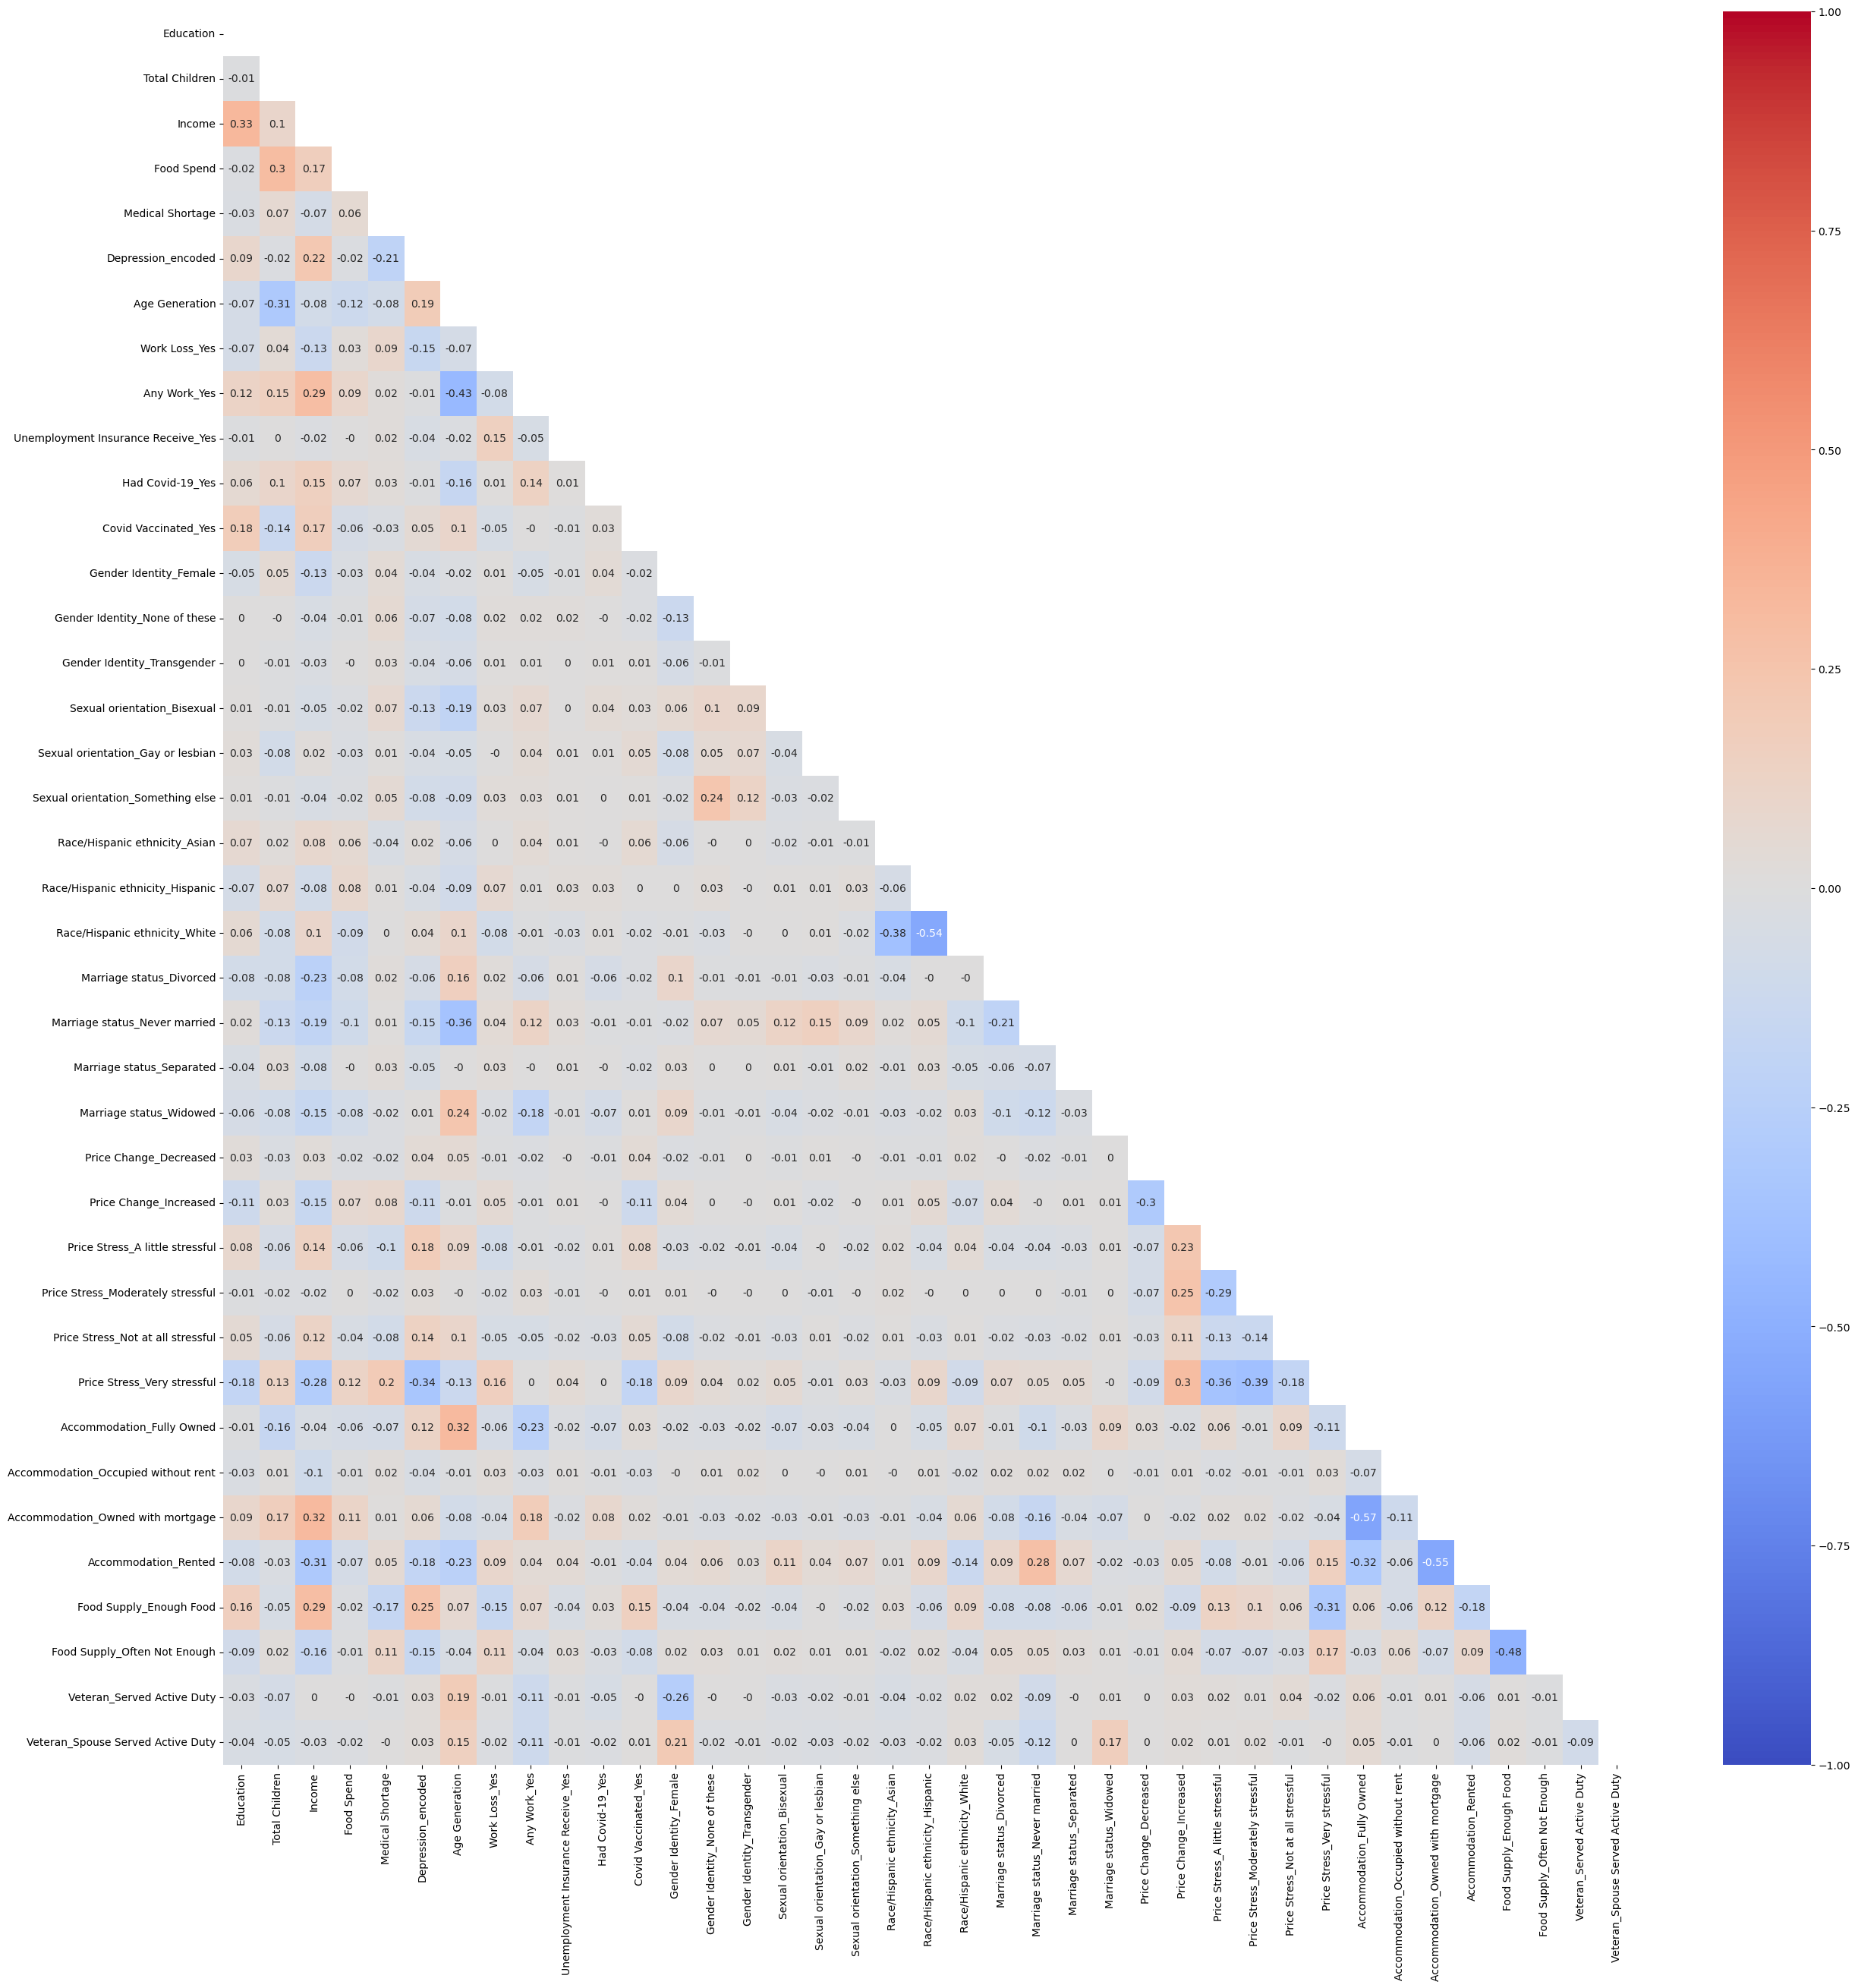

In [86]:
X = df.drop(columns ='Anxiety_encoded')
y = df['Anxiety_encoded']

corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(30, 30))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

In [87]:
df.drop(columns = ['Accommodation_Owned with mortgage','Race/Hispanic ethnicity_White'],inplace=True)

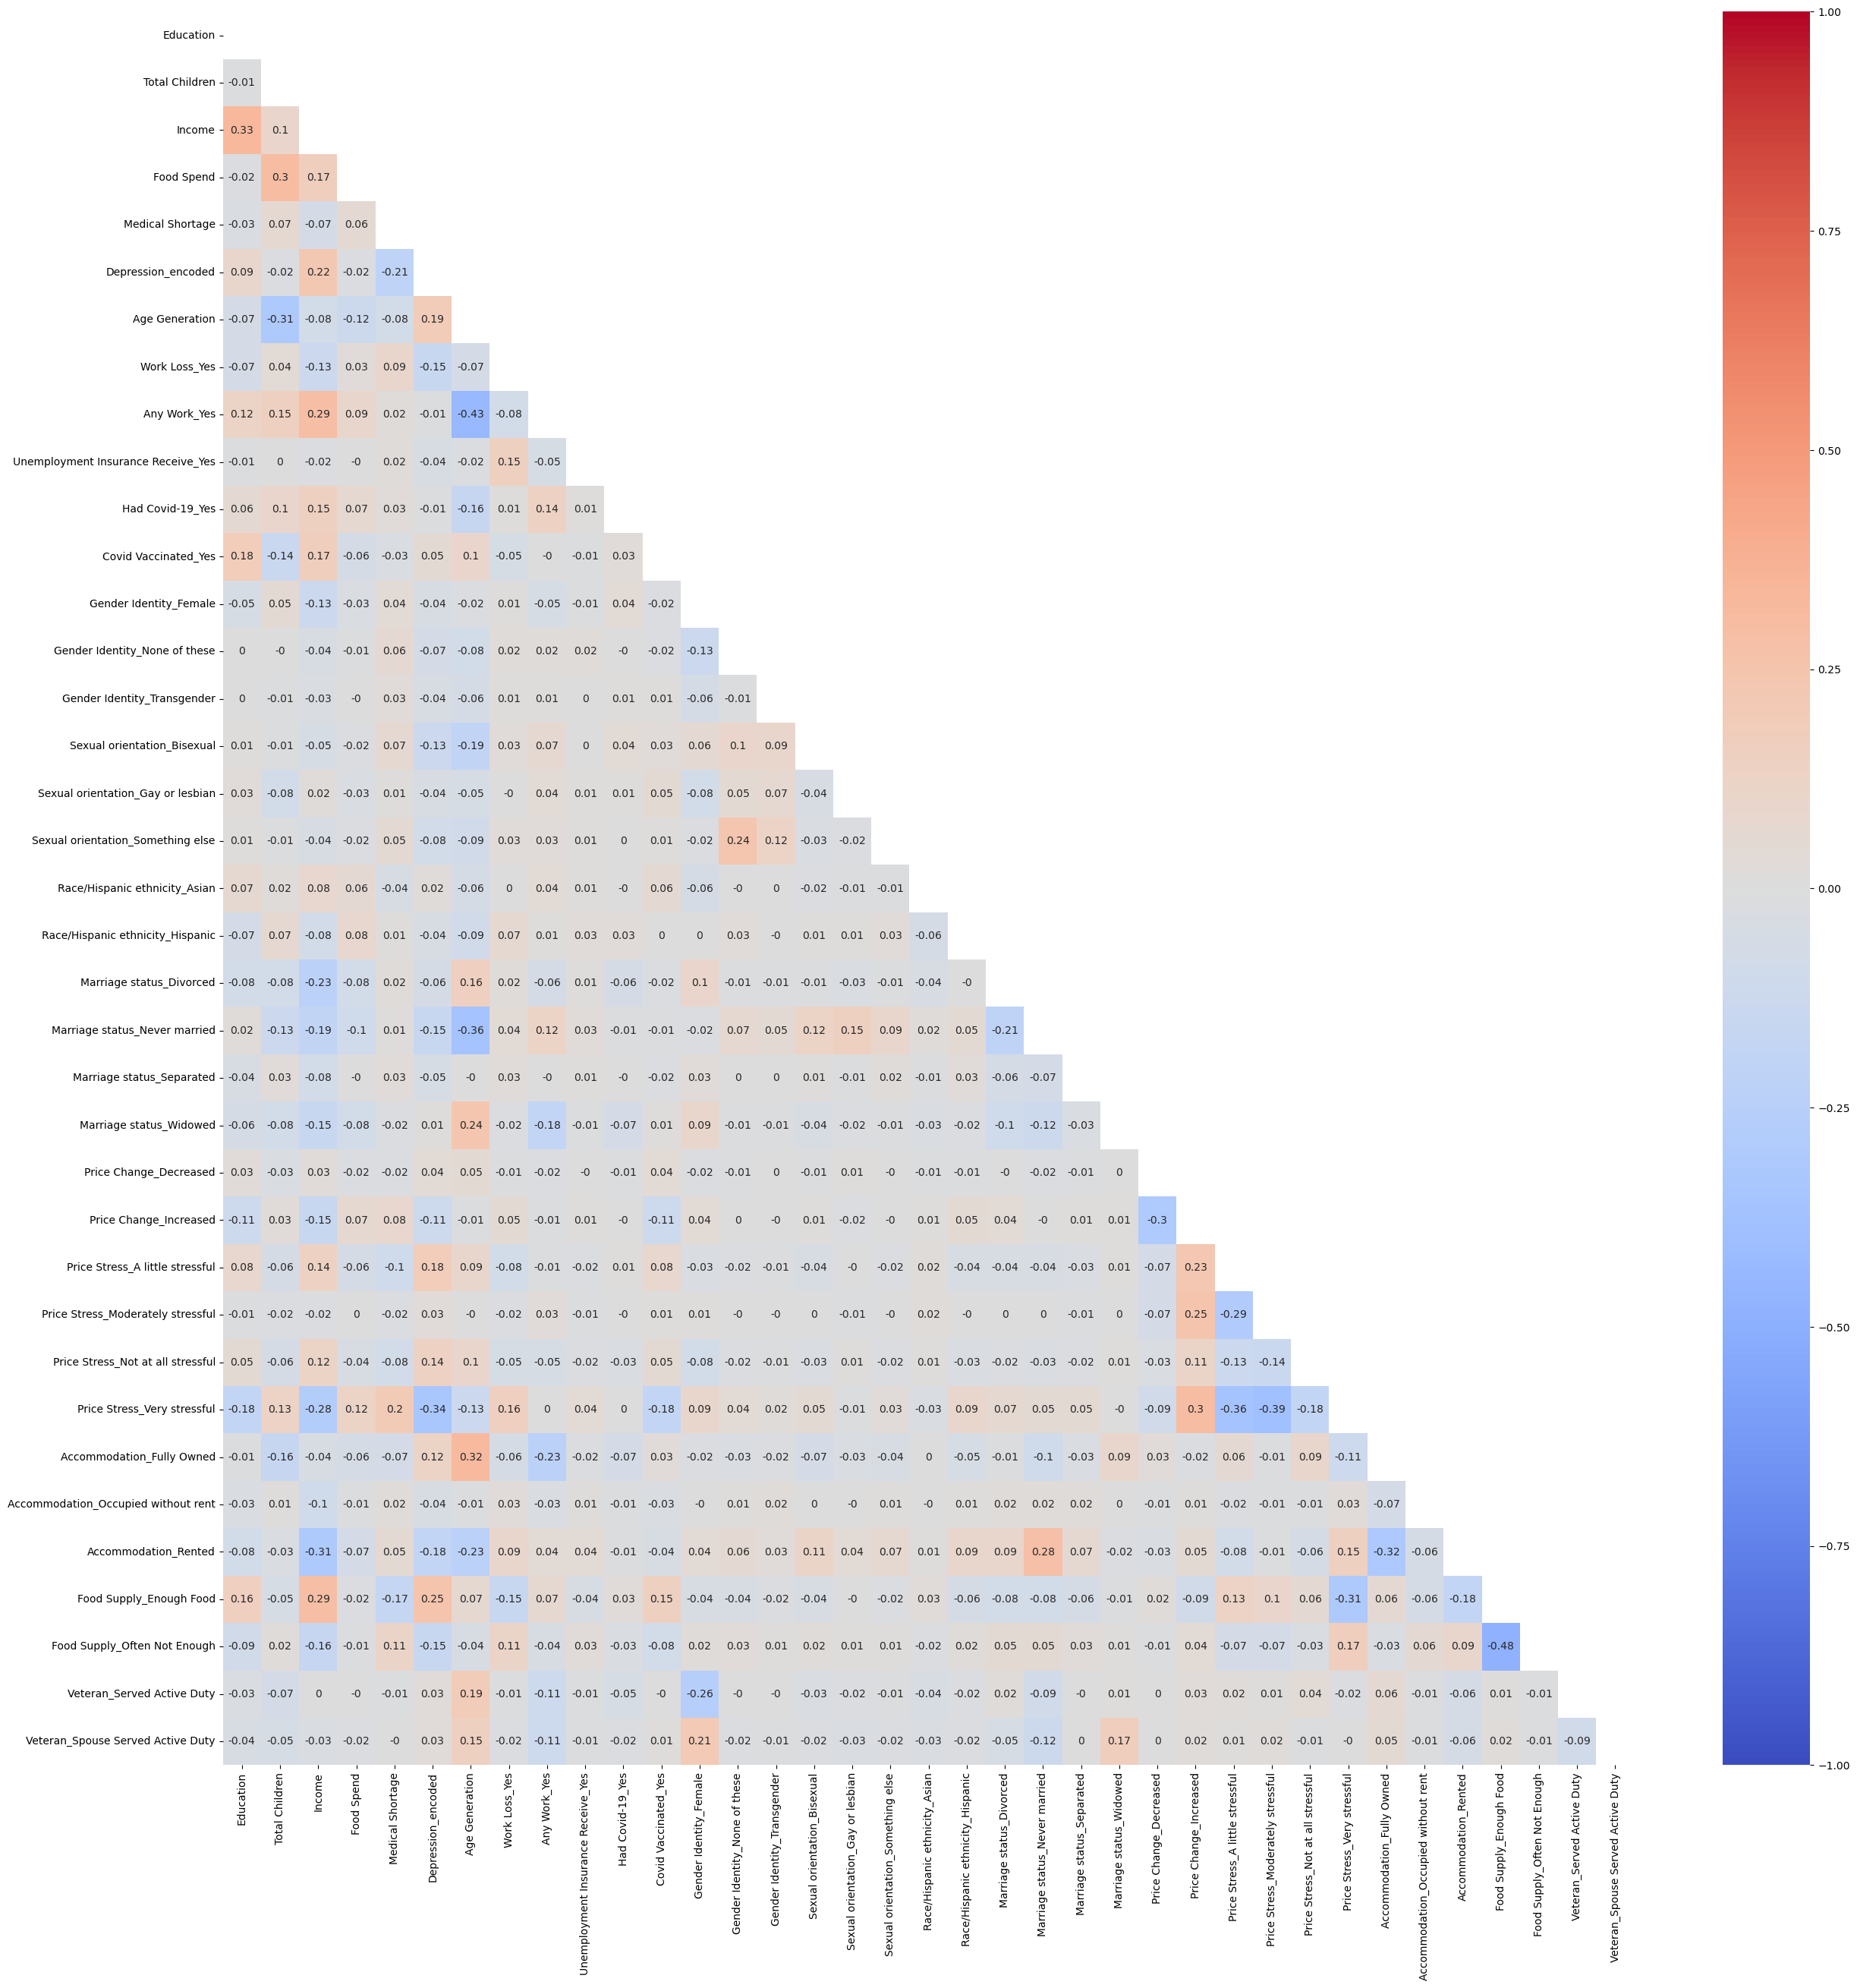

In [88]:
X = df.drop(columns ='Anxiety_encoded')
y = df['Anxiety_encoded']

corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(30, 30))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54584 entries, 0 to 54583
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Education                            54584 non-null  float64
 1   Total Children                       54584 non-null  int64  
 2   Income                               54584 non-null  float64
 3   Food Spend                           54584 non-null  float64
 4   Medical Shortage                     54584 non-null  int64  
 5   Depression_encoded                   54584 non-null  int64  
 6   Anxiety_encoded                      54584 non-null  int64  
 7   Age Generation                       54584 non-null  float64
 8   Work Loss_Yes                        54584 non-null  int64  
 9   Any Work_Yes                         54584 non-null  int64  
 10  Unemployment Insurance Receive_Yes   54584 non-null  int64  
 11  Had Covid-19_Yes            

### **Part 3 Multinomial Logistic Regression**

**Baseline Model**

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)


# Print the accuracy
print(f"Accuracy: {accuracy:}")

Accuracy: 0.6881927269396354


In [92]:
print(f'Train Score: {model.score(X_train, y_train)}')
print(f'Test Score: {model.score(X_test, y_test)}')

Train Score: 0.6862619369317792
Test Score: 0.6881927269396354


**Scale**

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:

# Instantiate and fit the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Score
print(f'Train Score: {model.score(X_train_scaled, y_train)}')
print(f'Test Score: {model.score(X_test_scaled, y_test)}')

Train Score: 0.7020633430279158
Test Score: 0.7030319684895118


**PCA**

In [95]:
# PCA import statement
from sklearn.decomposition import PCA

# Instantiate & fit PCA model
my_PCA = PCA()
my_PCA.fit(X_train_scaled)

# transform data 
X_train_PCA = my_PCA.transform(X_train_scaled)
X_test_PCA = my_PCA.transform(X_test_scaled)

In [96]:
print(f"Variance captured by PC1: {my_PCA.explained_variance_[0]: 0.3f}")
print(f"Variance captured by PC2: {my_PCA.explained_variance_[1]: 0.3f}")

print(f"Proportion of variance captured by PC1: {my_PCA.explained_variance_ratio_[0]: 0.3f}")
print(f"Proportion of variance captured by PC2: {my_PCA.explained_variance_ratio_[1]: 0.3f}")

Variance captured by PC1:  3.091
Variance captured by PC2:  2.434
Proportion of variance captured by PC1:  0.084
Proportion of variance captured by PC2:  0.066


In [97]:
X_train_PCA.shape

(43667, 37)

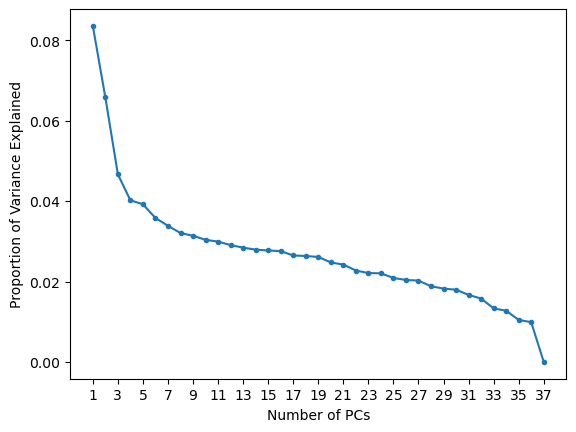

In [98]:
expl_var = my_PCA.explained_variance_ratio_

plt.figure()
plt.plot(range(1,X_train_PCA.shape[1]+1),expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,X_train_PCA.shape[1]+1,2))
plt.show()

In [99]:
# Instantiate and fit
my_PCA = PCA(n_components = 4)
my_PCA.fit(X_train_scaled)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train_scaled)
X_test_PCA = my_PCA.transform(X_test_scaled)

In [100]:
# Let's use all the default parameters for now
log_model_pca = LogisticRegression()

# Fitting to original data
log_model_pca.fit(X_train_PCA,y_train)

# Scoring on original train and test sets
print(f'Train Score: {log_model_pca.score(X_train_PCA, y_train)}')
print(f'Test Score: {log_model_pca.score(X_test_PCA, y_test)}')

Train Score: 0.5557514828131083
Test Score: 0.5695703947971055


- **Model Assessment with Accuracy Rate** <br>
    
| Model | Variables                                  | Accuracy Rate    |
|-------|--------------------------------------------|-------|
| 1 | Logistic Regression  - Baseline model                                        | 68.82% |
| 2 | Logistic Regression - After Scaling                        | 70.3% |
| 3 | Logistic Regression - After Scaling & PCA                       | 56.96% |

**Parameter Tuning**

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

estimators = [
    ('scaler',StandardScaler()),
    ('model',LogisticRegression())
]

pipe = Pipeline(estimators)

# set the optional values for three parameters
param_grid = [
    {
        'scaler':[StandardScaler()],
        'model':[LogisticRegression()],
        'model__solver':['lbfgs', 'liblinear', 'saga'],
        'model__C':[0.001, 0.01, 0.1, 1, 10, 100],
        'model__penalty': ['l1', 'l2']
    }
]

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,verbose=2)


fittedgrid = grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END model=LogisticRegression(), model__C=0.001, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.1s
[CV] END model=LogisticRegression(), model__C=0.001, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.001, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.001, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.001, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.001, model__penalty=l1, model__solver=liblinear, scaler=StandardScaler(); total time=   0.2s
[CV] END model=LogisticRegression(), model__C=0.001, model__penalty=l1, model__solver=liblinear, scaler=Standard

/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=1, model__penalty=l1, model__solver=saga, scaler=StandardScaler(); total time=   4.7s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=1, model__penalty=l1, model__solver=saga, scaler=StandardScaler(); total time=   4.5s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=1, model__penalty=l1, model__solver=saga, scaler=StandardScaler(); total time=   4.4s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=1, model__penalty=l1, model__solver=saga, scaler=StandardScaler(); total time=   4.4s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=1, model__penalty=l1, model__solver=saga, scaler=StandardScaler(); total time=   4.6s
[CV] END model=LogisticRegression(), model__C=1, model__penalty=l2, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.8s
[CV] END model=LogisticRegression(), model__C=1, model__penalty=l2, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.3s
[CV] END model=LogisticRegression(), model__C=1, model__penalty=l2, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.5s
[CV] END model=LogisticRegression(), model__C=1, model__penalty=l2, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.4s
[CV] END model=LogisticRegression(), model__C=1, model__penalty=l2, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.3s
[CV] END model=LogisticRegression(), model__C=1, model__penalty=l2, model__solver=liblinear, scaler=StandardScaler(); total time=   0.8s
[CV] END model=LogisticRegression(), model__C=1, model__penalty=l2

/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=1, model__penalty=l2, model__solver=saga, scaler=StandardScaler(); total time=   4.0s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=1, model__penalty=l2, model__solver=saga, scaler=StandardScaler(); total time=   4.1s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=1, model__penalty=l2, model__solver=saga, scaler=StandardScaler(); total time=   3.8s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=1, model__penalty=l2, model__solver=saga, scaler=StandardScaler(); total time=   3.7s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=1, model__penalty=l2, model__solver=saga, scaler=StandardScaler(); total time=   3.9s
[CV] END model=LogisticRegression(), model__C=10, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=10, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=10, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=10, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=10, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=10, model__penalty=l1, model__solver=liblinear, scaler=StandardScaler(); total time=   7.9s
[CV] END model=LogisticRegression(), model__C=10, model__pen

/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=10, model__penalty=l1, model__solver=saga, scaler=StandardScaler(); total time=   4.7s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=10, model__penalty=l1, model__solver=saga, scaler=StandardScaler(); total time=   4.3s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=10, model__penalty=l1, model__solver=saga, scaler=StandardScaler(); total time=   4.6s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=10, model__penalty=l1, model__solver=saga, scaler=StandardScaler(); total time=   4.4s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=10, model__penalty=l1, model__solver=saga, scaler=StandardScaler(); total time=   4.5s
[CV] END model=LogisticRegression(), model__C=10, model__penalty=l2, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.4s
[CV] END model=LogisticRegression(), model__C=10, model__penalty=l2, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.3s
[CV] END model=LogisticRegression(), model__C=10, model__penalty=l2, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.3s
[CV] END model=LogisticRegression(), model__C=10, model__penalty=l2, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.3s
[CV] END model=LogisticRegression(), model__C=10, model__penalty=l2, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.3s
[CV] END model=LogisticRegression(), model__C=10, model__penalty=l2, model__solver=liblinear, scaler=StandardScaler(); total time=   0.8s
[CV] END model=LogisticRegression(), model__C=10, model__pe

/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=10, model__penalty=l2, model__solver=saga, scaler=StandardScaler(); total time=   3.8s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=10, model__penalty=l2, model__solver=saga, scaler=StandardScaler(); total time=   4.0s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=10, model__penalty=l2, model__solver=saga, scaler=StandardScaler(); total time=   3.8s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=10, model__penalty=l2, model__solver=saga, scaler=StandardScaler(); total time=   3.7s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=10, model__penalty=l2, model__solver=saga, scaler=StandardScaler(); total time=   3.7s
[CV] END model=LogisticRegression(), model__C=100, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=100, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=100, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=100, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=100, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=100, model__penalty=l1, model__solver=liblinear, scaler=StandardScaler(); total time=  12.7s
[CV] END model=LogisticRegression(), model__C=100, mo

/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=100, model__penalty=l1, model__solver=saga, scaler=StandardScaler(); total time=   4.3s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=100, model__penalty=l1, model__solver=saga, scaler=StandardScaler(); total time=   4.3s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=100, model__penalty=l1, model__solver=saga, scaler=StandardScaler(); total time=   4.4s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=100, model__penalty=l1, model__solver=saga, scaler=StandardScaler(); total time=   4.5s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=100, model__penalty=l1, model__solver=saga, scaler=StandardScaler(); total time=   4.3s
[CV] END model=LogisticRegression(), model__C=100, model__penalty=l2, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.4s
[CV] END model=LogisticRegression(), model__C=100, model__penalty=l2, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.3s
[CV] END model=LogisticRegression(), model__C=100, model__penalty=l2, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.3s
[CV] END model=LogisticRegression(), model__C=100, model__penalty=l2, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.4s
[CV] END model=LogisticRegression(), model__C=100, model__penalty=l2, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.3s
[CV] END model=LogisticRegression(), model__C=100, model__penalty=l2, model__solver=liblinear, scaler=StandardScaler(); total time=   0.7s
[CV] END model=LogisticRegression(), model__C=100, m

/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=100, model__penalty=l2, model__solver=saga, scaler=StandardScaler(); total time=   3.7s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=100, model__penalty=l2, model__solver=saga, scaler=StandardScaler(); total time=   3.6s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=100, model__penalty=l2, model__solver=saga, scaler=StandardScaler(); total time=   3.7s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model=LogisticRegression(), model__C=100, model__penalty=l2, model__solver=saga, scaler=StandardScaler(); total time=   3.7s


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151,

[CV] END model=LogisticRegression(), model__C=100, model__penalty=l2, model__solver=saga, scaler=StandardScaler(); total time=   3.5s


In [102]:
fittedgrid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=0.01, penalty='l1', solver='saga'))])

In [103]:
# Best hyperparameters
fittedgrid.best_params_

{'model': LogisticRegression(C=0.01, penalty='l1', solver='saga'),
 'model__C': 0.01,
 'model__penalty': 'l1',
 'model__solver': 'saga',
 'scaler': StandardScaler()}

In [104]:
fittedgrid.best_score_

0.701742792585397

In [105]:
#get the test_score using the best parameters
test_score = fittedgrid.score(X_test,y_test)
test_score

0.7036731702848767

- **Model Assessment with Accuracy Rate** <br>
    
| Model | Variables                                  | Accuracy Rate    |
|-------|--------------------------------------------|-------|
| 1 | Logistic Regression  - Baseline model                                        | 68.82% |
| 2 | Logistic Regression - After Scaling                        | 70.3% |
| 3 | Logistic Regression - After Scaling & PCA                       | 56.96% |
| 4 | Logistic Regression - Scaling & Hyperparameter                     | 70.37% |

**Model Evaluation**

In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = best_model.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels based on your specific problem
class_labels = ['Class 1', 'Class 2', 'Class 3']  # Replace with your actual class labels

# Create a DataFrame with labeled rows and columns
cf_df = pd.DataFrame(cf_matrix, columns=class_labels, index=class_labels)

# Display the confusion matrix
display(cf_df)


Class 1  Class 2  Class 3
Class 1     1429      779      186
Class 2      443     1962     1247
Class 3       82      498     4291

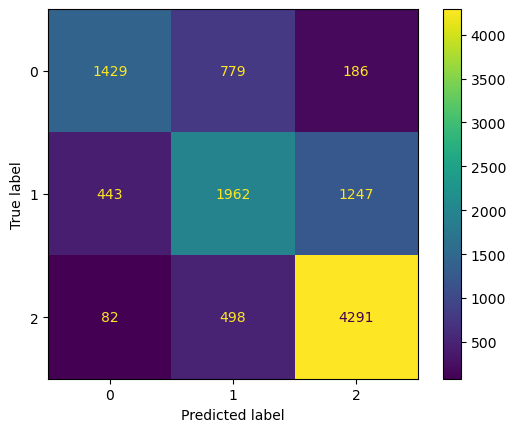

In [109]:
# the function expects the estimator, inputs and target as parameters
ConfusionMatrixDisplay.from_estimator(best_model,X_test, y_test)

**Classification_report**

In [110]:
from sklearn.metrics import classification_report
report_initial = classification_report(y_test,y_pred)

print(report_initial)

              precision    recall  f1-score   support

           0       0.73      0.60      0.66      2394
           1       0.61      0.54      0.57      3652
           2       0.75      0.88      0.81      4871

    accuracy                           0.70     10917
   macro avg       0.70      0.67      0.68     10917
weighted avg       0.70      0.70      0.70     10917



**Random Forest** 

In [79]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate and fit the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model (you can use different metrics)
accuracy_rf = rf_classifier.score(X_test, y_test)
print("Random Forest Classifier Accuracy:", accuracy_rf)

Random Forest Classifier Accuracy: 0.7029403682330311


In [111]:
df2 = pd.read_csv('/Users/kouyuyang/Brainstation/Capstone/Sprint 2/Feature Engineering Data.csv')

df2.head()

Education  Total People  Total Children  Income  Food Spend  \
0        4.0             2               0     7.0       200.0   
1        3.0             1               0     4.0       200.0   
2        4.0             1               0     6.0        65.0   
3        2.0             4               1     0.0       200.0   
4        4.0             2               0     6.0       300.0   

   Medical Shortage  Depression_encoded  Anxiety_encoded  Age Generation  \
0                 0                   0                1             1.0   
1                 0                   0                0             3.0   
2                 0                   1                1             1.0   
3                 0                   2                2             2.0   
4                 0                   0                0             1.0   

   Work Loss_No  ...  Accommodation_Rented  Food Supply_Enough Food  \
0             1  ...                     0                        1   
1             0  ...                     0                        1   
2             1  ...                     0                        1   
3             1  ...                     1                        0   
4             1  ...                     1                        1   

   Food Supply_Often Not Enough  Food Supply_Sometimes Not Enough  \
0                             0                                 0   
1                             0                                 0   
2                             0                                 0   
3                             0                                 1   
4                             0                                 0   

   Active Duty_No  Active Duty_On Active Duty  \
0               1                           0   
1               1                           0   
2               1                           0   
3               1                           0   
4               1                           0   

   Active Duty_Spouse On Active Duty  Veteran_No  Veteran_Served Active Duty  \
0                                  0           1                           0   
1                                  0           1                           0   
2                                  0           1                           0   
3                                  0           1                           0   
4                                  0           1                           0   

   Veteran_Spouse Served Active Duty  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 56 columns]

In [112]:
X2 = df2.drop(columns ='Anxiety_encoded')
y2 = df2['Anxiety_encoded']

In [113]:
df2.drop(columns=['Race/Hispanic ethnicity_Black','Active Duty_No','Active Duty_On Active Duty','Active Duty_Spouse On Active Duty'],inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54584 entries, 0 to 54583
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Education                            54584 non-null  float64
 1   Total People                         54584 non-null  int64  
 2   Total Children                       54584 non-null  int64  
 3   Income                               54584 non-null  float64
 4   Food Spend                           54584 non-null  float64
 5   Medical Shortage                     54584 non-null  int64  
 6   Depression_encoded                   54584 non-null  int64  
 7   Anxiety_encoded                      54584 non-null  int64  
 8   Age Generation                       54584 non-null  float64
 9   Work Loss_No                         54584 non-null  int64  
 10  Work Loss_Yes                        54584 non-null  int64  
 11  Any Work_No                 

In [114]:
X2 = df2.drop(columns ='Anxiety_encoded')
y2 = df2['Anxiety_encoded']

In [115]:
# Split your data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

**Baseline Model**

In [116]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate and fit the Random Forest Classifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X2_train, y2_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X2_test)

# Evaluate the model (you can use different metrics)
accuracy_rf = rf_classifier.score(X2_test, y2_test)
print("Random Forest Classifier Accuracy:", accuracy_rf)

Random Forest Classifier Accuracy: 0.6784830997526793


**Hyperparameter Tunning**

In [117]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20],    # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}


In [118]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search on the training data
grid_search.fit(X2_train, y2_train)

# Get the best model with optimal hyperparameters
best_model = grid_search.best_estimator_


/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/kouyuyang/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constrai

In [120]:
# Predict on the test data using the best model
y_pred = best_model.predict(X2_test)

# Calculate accuracy
accuracy = accuracy_score(y2_test, y_pred)
print(f"Random Forest Tuned Accuracy: {accuracy}")

Random Forest Tuned Accuracy: 0.7009251625904552


- **Model Assessment with Accuracy Rate** <br>
    
| Model | Variables                                  | Accuracy Rate    |
|-------|--------------------------------------------|-------|
| 1 | Logistic Regression  - Baseline model                                        | 68.82% |
| 2 | Logistic Regression - After Scaling                        | 70.3% |
| 3 | Logistic Regression - After Scaling & PCA                       | 56.96% |
| 4 | Logistic Regression - Scaling & Hyperparameter                     | 70.37% |
| 5 | Random Forest - Baseline Model                    | 67.85% |
| 6 | Random Forest - Hyperparameter Tunning                     | 70.09% |